## AML and OneLake/ Fabric Better Together Demo:

You can use OneLake's capability to create shortcuts within a Lakehouse to read and write data stored in Azure Data Lake Gen2. Since Azure Machine Learning supports Azure Data Lake Gen2 storage, this setup allows you to use Fabric and Azure Machine Learning together. The data architecture is as follows:

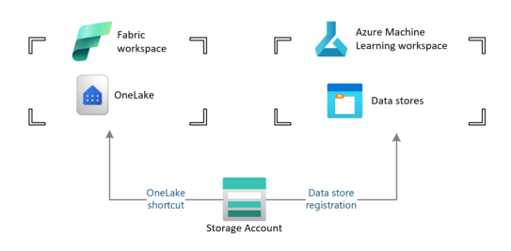

https://learn.microsoft.com/en-us/azure/machine-learning/how-to-use-batch-fabric?view=azureml-api-2

In [3]:
%pip install azure-ai-ml -U 
%pip install azure-identity
%pip install mltable azureml-dataprep[pandas] -U 
%pip install azureml-fsspec -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 956.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 994.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 1.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 28.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 3.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.5/394.5 kB 7.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.0/251.0 kB 7.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.0/267.0 kB 3.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 662.7 kB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 1.3 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

In [2]:
subscription_id = "f1ea6ed8-82f3-416d-881b-8b376218bc85" 
resource_group = "rg_aml" 
workspace = "aml-default"

In [3]:
ml_client = MLClient(
    DefaultAzureCredential(), subscription_id, resource_group, workspace
)

In [4]:
from azure.ai.ml.entities import OneLakeDatastore, OneLakeArtifact

In [21]:
artifact = OneLakeArtifact(
    name="amlsilver.Lakehouse",
    type="lake_house"
)
#abfss://amldemo@onelake.dfs.fabric.microsoft.com/amlsilver.Lakehouse/Files/data-aml/safedriverdata_delta
store = OneLakeDatastore(
    name="onelake_lh_for_azureml",
    description="Credential-less OneLake datastore.",
    endpoint="onelake.dfs.fabric.microsoft.com",
    artifact=artifact,
    one_lake_workspace_name="amldemo",
)

Class OneLakeArtifact: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class OneLakeDatastore: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.


In [20]:
ml_client.create_or_update(store)

OneLakeDatastore({'type': <DatastoreType.ONE_LAKE: 'OneLake'>, 'name': 'onelake_allstate', 'description': 'Credential-less OneLake datastore.', 'tags': {}, 'properties': {}, 'print_as_yaml': False, 'id': '/subscriptions/f1ea6ed8-82f3-416d-881b-8b376218bc85/resourceGroups/rg_aml/providers/Microsoft.MachineLearningServices/workspaces/aml-default/datastores/onelake_allstate', 'Resource__source_path': '', 'base_path': '/mnt/batch/tasks/shared/LS_root/mounts/clusters/ci0322a2m/code/Users/alex/fabric', 'creation_context': None, 'serialize': <msrest.serialization.Serializer object at 0x7f2db48098d0>, 'credentials': <azure.ai.ml.entities._credentials.NoneCredentialConfiguration object at 0x7f2db4808fd0>, 'artifact': {'name': '5ec041f5-7efb-4431-94a5-558d83966194', 'type': 'lake_house'}, 'one_lake_workspace_name': 'amldemo', 'endpoint': 'onelake.dfs.fabric.microsoft.com'})

<!-- subscription_id = "f1ea6ed8-82f3-416d-881b-8b376218bc85" 
resource_group = "rg_aml" 
workspace = "aml-default" -->

In [5]:
from azure.ai.ml.constants import AssetTypes, InputOutputModes
from azureml.fsspec import AzureMachineLearningFileSystem

In [6]:
uri = 'azureml://subscriptions/f1ea6ed8-82f3-416d-881b-8b376218bc85/resourcegroups/rg_aml/workspaces/aml-default/datastores/onelake_lh_for_azureml'

# create the filesystem
fs = AzureMachineLearningFileSystem(uri)

In [10]:
fs.ls('Files/data-aml/diabetes')

['Files/data-aml/diabetes/diabetes.csv']

In [11]:
with fs.open('Files/data-aml/diabetes/diabetes.csv') as f:
    data = f.readlines()
    print(data[0:5])
    f.close()

[b'age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target\n', b'0.0380759064334241,0.0506801187398187,0.0616962065186885,0.0218723549949558,-0.0442234984244464,-0.0348207628376986,-0.0434008456520269,-0.00259226199818282,0.0199084208763183,-0.0176461251598052,151.0\n', b'-0.00188201652779104,-0.044641636506989,-0.0514740612388061,-0.0263278347173518,-0.00844872411121698,-0.019163339748222,0.0744115640787594,-0.0394933828740919,-0.0683297436244215,-0.09220404962683,75.0\n', b'0.0852989062966783,0.0506801187398187,0.0444512133365941,-0.00567061055493425,-0.0455994512826475,-0.0341944659141195,-0.0323559322397657,-0.00259226199818282,0.00286377051894013,-0.0259303389894746,141.0\n', b'-0.0890629393522603,-0.044641636506989,-0.0115950145052127,-0.0366564467985606,0.0121905687618,0.0249905933641021,-0.0360375700438527,0.0343088588777263,0.0226920225667445,-0.0093619113301358,206.0\n']


In [13]:

from azure.ai.ml.entities import Data

In [14]:
csv_path = 'azureml://datastores/onelake_lh_for_azureml/paths/Files/data-aml/diabetes'
my_csv_data = Data(
        path=csv_path,
        type=AssetTypes.URI_FOLDER,
        description="demo",
        name="csv_data_source",
        version="1.0.0"
)

ml_client.data.create_or_update(my_csv_data)

Data({'path': 'azureml://subscriptions/f1ea6ed8-82f3-416d-881b-8b376218bc85/resourcegroups/rg_aml/workspaces/aml-default/datastores/onelake_lh_for_azureml/paths/Files/data-aml/diabetes/', 'skip_validation': False, 'mltable_schema_url': None, 'referenced_uris': None, 'type': 'uri_folder', 'is_anonymous': False, 'auto_increment_version': False, 'auto_delete_setting': None, 'name': 'csv_data_source', 'description': 'demo', 'tags': {}, 'properties': {}, 'print_as_yaml': False, 'id': '/subscriptions/f1ea6ed8-82f3-416d-881b-8b376218bc85/resourceGroups/rg_aml/providers/Microsoft.MachineLearningServices/workspaces/aml-default/data/csv_data_source/versions/1.0.0', 'Resource__source_path': '', 'base_path': '/mnt/batch/tasks/shared/LS_root/mounts/clusters/ci0322a2m/code/Users/alex/fabric', 'creation_context': <azure.ai.ml.entities._system_data.SystemData object at 0x7fe9d388ad70>, 'serialize': <msrest.serialization.Serializer object at 0x7fe9d3889db0>, 'version': '1.0.0', 'latest_version': None, 

In [15]:
import pandas as pd

In [16]:
csv_data = ml_client.data.get("csv_data_source", version="1.0.0")


In [17]:
import mltable

In [18]:

path = {
  'folder': csv_data.path
}

tbl = mltable.from_delimited_files(paths=[path])

In [19]:
df = pd.read_csv( csv_data.path + '/diabetes.csv')

In [20]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
